<a href="https://colab.research.google.com/github/adityasankalp/Iris_ML/blob/main/Iris_species_with_basics_of_gradient_descent_Rev_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the relevant modules , numpy, pandas and tensorflow

In [1]:
# import the relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
import math as math
import matplotlib.pyplot as plt

Load the Iris file and store it in a dataframe. Check the data

In [2]:
# the dataset is imported from google drive. 
# a confirmation will be required
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the database in a dataframe from google drive
# edit the path to the google drive
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Iris.csv') 

In [4]:
data1.head(10) # examine the first 10 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data2 = data1.copy() # copy the database in a new dataframe
data2.shape
# randomize the dataframe
data_3 = data2.sample(frac = 1).reset_index(drop = "true") 
data_test = data_3[:10] # copies 10 data for test
data_train = data_3[20:].reset_index(drop ='true') # copies 130 data for training
data_ft = data_3[10:20] # Additional 10 data for further testing

In [6]:
# copy the features in training data
x_train = data_train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].copy()
x_train.head()
x_test = data_test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].copy()
x_ft = data_ft[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].copy()

# copy the labels for comparison
y_train = data_train[["Species"]].copy()
y_test = data_test[["Species"]].copy()
y_ft = data_ft[["Species"]].copy()
y_train.head()

,Species
0,Iris-virginica
1,Iris-setosa
2,Iris-versicolor
3,Iris-virginica
4,Iris-virginica


In [7]:
# Convert training data to matrix format  from dataframe to model
x_trainA = np.array(x_train)
print(x_trainA.shape)
x_testA = np.array(x_test)
x_ftA = np.array(x_ft)

(130, 4)


In [8]:
# one- hot encoding of the labels required as labels are in string format.
# store indices inplace of string to allow one hot encoding
y_testA = y_test.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y_trainA = y_train.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y_ftA = y_ft.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

# one hot encoding of indices
y_testB = tf.one_hot(y_testA['Species'].tolist(),3) 
#print(y_testB)
y_trainB = tf.one_hot(y_trainA['Species'].tolist(),3)
#print(y_trainB)
y_ftB = np.array(tf.one_hot(y_ftA['Species'].tolist(),3))

In [9]:
# convert it to array format for vector operations.
y_trainB2 = np.array(y_trainB)
y_testB2 = np.array(y_testB)

In [10]:
# Sigma Activation function
def sigma(x):
  x1 = 1/(1+np.exp(-x))
  return(x1)

# Relu function
def relu_f(x):
  return(np.maximum(0,x))

# defines the derivative of relu function
def relu_d(x):
  return(np.greater(x, 0).astype(int))

# Alternative way for defintion of derivative of relu function
#def relu2(x):
  #x[x<=0] =0
  #x[x>0] = 1
  #return(x)

# Softmax function
def soft(x):
  return(np.exp(x)/np.sum(np.exp(x),axis = 0 ,keepdims = 1))


    

**TRAINING OF MODEL**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


Loss after Training is =  0.206


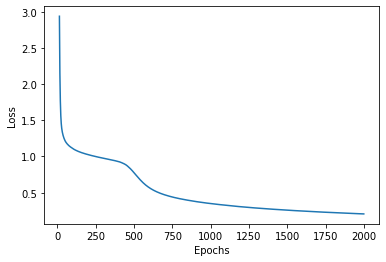

In [46]:
# TRAINING OF MODEL
m1 = x_trainA.shape[0] # number of training examples

learning_rate = 0.01 

w1 = np.random.rand(4,256) # Hidden layer weight(32 nodes);random initialization
b1 = np.random.rand(256,1) # Hidden layer bias
w2 = np.random.rand(256,3) # output layer weight 
b2 = np.random.rand(3,1) # output layer bias

Loss1 = 0
loss2 = []
dz1 = 0
dz2 = 0
dw1 = 0
dw2 = 0
db1 = 0 
db2 = 0
for i in range(0,2000): # number of epochs or cycles
  # forward propagation equations
  z1 = (w1.T) @ (x_trainA.T) + b1 
  a1 = relu_f(z1)
  z2 = (w2.T) @ (a1) + b2
  #a2a = relu_f(z2)
  a2 = sigma(z2)
  Loss1 = np.sum(-(y_trainB2.T*np.log(a2) + (1-y_trainB2.T)*(np.log(1-a2)))/m1)
  #print(Loss1)
  loss2.append(Loss1)

  # backward propagation
  dz2 = (a2 - y_trainB2.T)
  dw2 = (a1 @ dz2.T)
  db2 = (np.sum(dz2))

  dz1 = (w2 @ dz2)*(relu_d(a1))
  dw1 = (x_trainA.T @ dz1.T)
  db1 = (np.sum(dz1))

  w2 = w2 - learning_rate*dw2/m1
  b2 = b2 - learning_rate*db2/m1
  w1 = w1 - learning_rate*dw1/m1
  b1 = b1 - learning_rate*db1/m1

print("Loss after Training is = ",round(Loss1,3))
# plotting of loss vs epochs
plt.plot(list(range(0,2000)),loss2)
plt.grid(which = 'minor', axis ='both')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [47]:
# function to compare labels and test loadcases
def compare(x2,y2):
  label = ['Iris-setosa','Iris-versicolor','Iris-virginica']
  t2 = (np.greater(x2,0.7).astype(int))
  t3 = np.argmax(t2,axis = 0)
  t4 = np.argmax(y2,axis = 1)
  t55 =[]
  k = 0
  for i in range(0,10):
    t55.append('Test is '+label[t3[i]]+'  Label is '+label[t4[i]])
    if(np.array_equal(t2.T[i],y2[i])):
      k+= 1
  acc= k/len(y2)
  return(t55,acc)



In [48]:
# function to evaluate the test set after training model

def evaluate_model(x1,y1):
  z11 = (w1.T) @ (x1.T) + b1
  a11 = relu_f(z11)
  z22 = (w2.T) @ (a11) + b2
  #a22a = relu_f(z22)
  a22 = sigma(z22)

  #Loss11 = np.sum(-(y1.T*np.log(a22) + (1-y1.T)*(np.log(1-a22)))/len(x1)) 
  return(a22)

In [49]:
# Check results for test set
v1 = evaluate_model(x_testA,y_testB2)
v2 = compare(v1,y_testB2)
print("Accuracy",v2[1])
for i in v2[0]:
  print(i) 

Accuracy 0.9
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-versicolor  Label is Iris-versicolor
Test is Iris-setosa  Label is Iris-versicolor
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-versicolor  Label is Iris-versicolor


In [50]:
#Check results for additional test set
v3 = evaluate_model(x_ftA,y_ftB)
v4 = compare(v3,y_ftB)
#print("Loss is",round(v3[1],3))
print("Accuracy",v4[1])
for i in v4[0]:
  print(i) 

Accuracy 0.9
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-virginica  Label is Iris-versicolor
Test is Iris-virginica  Label is Iris-virginica
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-versicolor  Label is Iris-versicolor
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-setosa  Label is Iris-setosa
Test is Iris-versicolor  Label is Iris-versicolor


**COMPARISON WITH KERAS IMPLEMENTATION OF MODEL**

---



In [ ]:
#Model architecture using 1 hidden layer and 1 output layer 
model = tf.keras.models.Sequential()     
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)))    
model.add(tf.keras.layers.Dense(3, activation='softmax'))   

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the loss function, momentum (optimiser) and metrics
model.compile(loss='categorical_crossentropy',optimizer= 'SGD',metrics=['accuracy'])

history = model.fit(x_trainA, y_trainB,
                    batch_size=0,
                    epochs=600,
                    verbose=1,
                    validation_data=(x_testA, y_testB))

In [ ]:
# Evaluate the test data
score = model.evaluate(x_testA, y_testB, verbose=0)
# Prints out scores
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02547186240553856
Test accuracy: 1.0
